### Import Library

In [1]:
# pandas untuk manipulasi data, seaborn untuk plotting chart, matplotlib untuk chart, np untuk operasi matematika dsb
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib
import numpy as np
import textwrap
import datetime

# inisialisasi now sebagai nama file 
now = datetime.datetime.today().strftime('%d-%m-%Y')

# Image dan Markdown untuk menampilkan foto dan markdown menggunakan kode
from IPython.display import Image
from IPython.display import Markdown

# palette untuk 'gender'
colors = ["#0096c7", "#f07167", "#1ac938"]

# cmap mako untuk stacked bar
mako = LinearSegmentedColormap.from_list('mako', ['#505484', '#489c9c'], N=100)
cmap_jabfung = LinearSegmentedColormap.from_list('cmap_jabfung', ['#857aab', '#b55d60', '#5975a4', '#cc8963', '#5f9e6e'], N=100)

# inisialisasi tema untuk whitegrid
sns.set_theme(style="whitegrid")

### Read Data

In [2]:
df = pd.read_csv(f'data//dosen_12_03_2023.csv', encoding='utf-8')
df = df[df['fakultas'].str.contains('FK') == False]
# df = df.reset_index(drop=True)
df = df.astype({'sinta_score': 'Int64', 'sinta_3yr_score': 'Int64', 'scopus_h_index': 'Int64', 'gs_h_index': 'Int64'})
df.head()

,nip,sinta_id,nama,gender,pend_terakhir,gol,jabfung,status_pegawai,fakultas,nama_tanpa_gelar,sinta_score,sinta_3yr_score,scopus_h_index,gs_h_index
0,196202081986011002,5995348,"Prof. Dr. H. M. Solehuddin, M.Pd., M.A.",Laki-laki,S3,IV/c,Guru Besar,PNS,FIP,M. SOLEHUDDIN,649,248,3,9
1,195306031980021003,5980905,"Prof. Dr. H. Mohammad Ali, M.Pd., M.A.",Laki-laki,S3,IV/e,Guru Besar,PNS,FIP,MOHAMMAD ALI,1039,422,3,28
2,195404021980112001,5979054,"Prof. Dr. Hj. Ihat Hatimah, M.Pd.",Perempuan,S3,IV/e,Guru Besar,PNS,FIP,IHAT HATIMAH,469,207,1,12
3,195501011981011001,5977826,"Prof. Dr. H. Achmad Hufad, M.Ed.",Laki-laki,S3,IV/e,Guru Besar,PNS,FIP,ACHMAD HUFAD,1900,819,6,11
4,196111091987031001,5994180,"Prof. Dr. H. Mustofa Kamil, M.Pd.",Laki-laki,S3,IV/e,Guru Besar,PNS,FIP,MUSTOFA KAMIL,678,249,2,14


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 0 to 1564
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nip               1559 non-null   int64 
 1   sinta_id          1559 non-null   int64 
 2   nama              1559 non-null   object
 3   gender            1559 non-null   object
 4   pend_terakhir     1559 non-null   object
 5   gol               1542 non-null   object
 6   jabfung           1559 non-null   object
 7   status_pegawai    1559 non-null   object
 8   fakultas          1559 non-null   object
 9   nama_tanpa_gelar  1559 non-null   object
 10  sinta_score       1367 non-null   Int64 
 11  sinta_3yr_score   1367 non-null   Int64 
 12  scopus_h_index    1367 non-null   Int64 
 13  gs_h_index        1367 non-null   Int64 
dtypes: Int64(4), int64(2), object(8)
memory usage: 188.8+ KB


In [4]:
df.isnull().sum()

nip                   0
sinta_id              0
nama                  0
gender                0
pend_terakhir         0
gol                  17
jabfung               0
status_pegawai        0
fakultas              0
nama_tanpa_gelar      0
sinta_score         192
sinta_3yr_score     192
scopus_h_index      192
gs_h_index          192
dtype: int64

In [5]:
duplikasi = df.duplicated().sum()

print(duplikasi)

0


In [6]:
custom_palette = sns.set_palette(sns.color_palette(colors))

chart = 'Jumlah Dosen UPI Berdasarkan Gender dan Pendidikan Terakhir'

Markdown("""
### {title}
""".format(title=chart))


### Jumlah Dosen UPI Berdasarkan Gender dan Pendidikan Terakhir


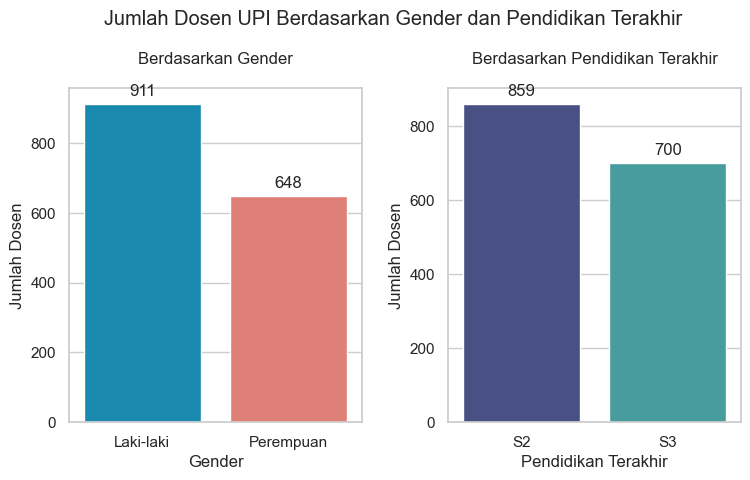

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4.5))
fig.tight_layout(pad=2.5)

plt.suptitle(f'{chart}', y=1.07)

list_col = ['gender', 'pend_terakhir']
list_title = ['Gender', 'Pendidikan Terakhir']
list_color = []
list_color.append(custom_palette)
list_color.append("mako")

for x, y, z, ax in zip(list_col, list_color, list_title, axes.flatten()):
    g = sns.countplot(x=x, data=df, palette=y, order=df[x].value_counts().index, ax=ax)
    g.set(ylabel='Jumlah Dosen', xlabel=z)
    g.set_title(f'Berdasarkan {z}',fontweight="normal", size=12, y=1.05)
    
    for container in g.containers:
        g.bar_label(container, padding=4)

plt.show()

In [8]:
chart = 'Jumlah Dosen UPI Berdasarkan Jabatan Fungsional'

Markdown("""
### {title}
""".format(title=chart))


### Jumlah Dosen UPI Berdasarkan Jabatan Fungsional


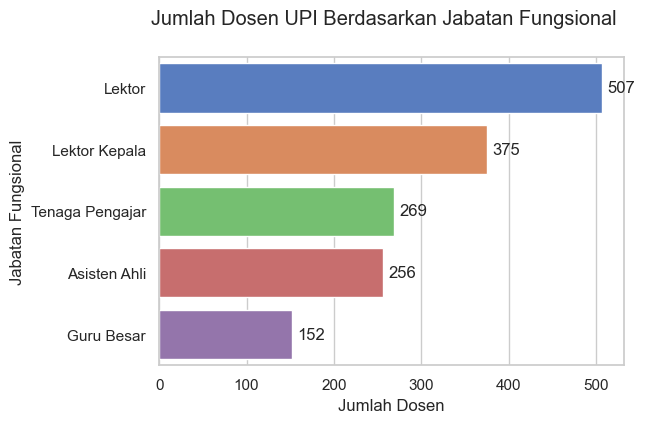

In [9]:
plt.figure(figsize=(6, 4))
plt.suptitle(f'{chart}', y=1)

g = sns.countplot(data=df, y='jabfung', order=df['jabfung'].value_counts().index, palette='muted')
g.set(ylabel='Jabatan Fungsional', xlabel='Jumlah Dosen')

for container in g.containers:
    g.bar_label(container, padding=4)

plt.show()

In [10]:
chart = 'Jumlah Dosen UPI Berdasarkan Golongan'

Markdown("""
### {title}
""".format(title=chart))


### Jumlah Dosen UPI Berdasarkan Golongan


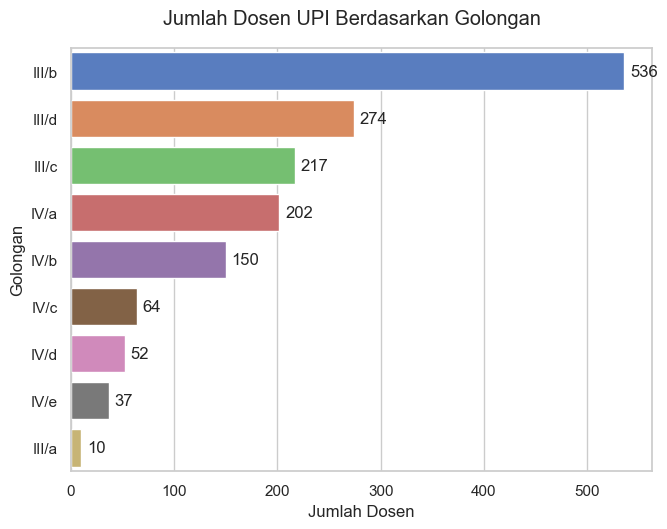

In [11]:
plt.figure(figsize=(7.5, 5.5))
plt.suptitle(f'{chart}', y=0.95)

g = sns.countplot(data=df, y='gol', order=df['gol'].value_counts().index, palette='muted')
g.set(ylabel='Golongan', xlabel='Jumlah Dosen')

for container in g.containers:
    g.bar_label(container, padding=4)

plt.show()

In [12]:
chart = 'Jumlah Dosen UPI Setiap Unit Akademik'

Markdown("""
### {title}
""".format(title=chart))


### Jumlah Dosen UPI Setiap Unit Akademik


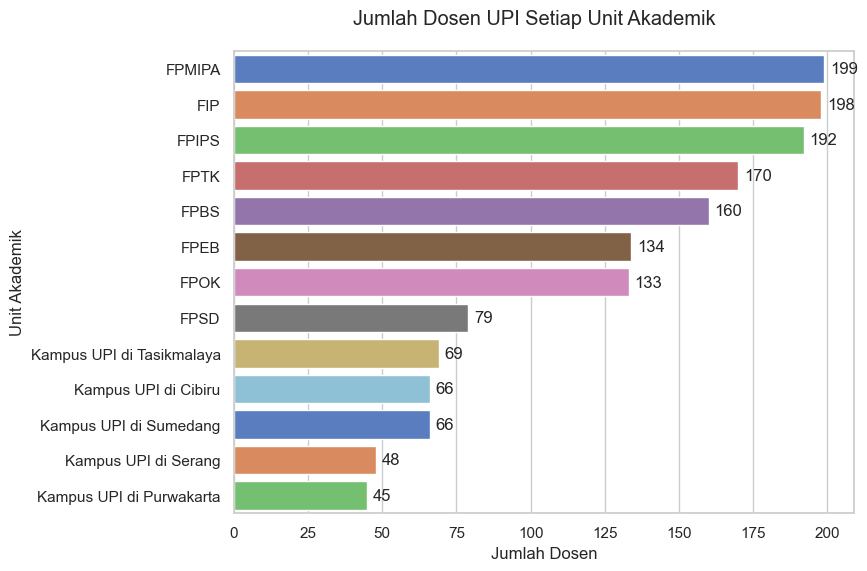

In [13]:
plt.figure(figsize=(8, 6))
plt.suptitle(f'{chart}', y=0.95)

g = sns.countplot(data=df, y='fakultas', order=df['fakultas'].value_counts().index, palette='muted')
g.set(ylabel='Unit Akademik', xlabel='Jumlah Dosen')

for container in g.containers:
    g.bar_label(container, padding=4)

plt.show()

### Transform Data Stacked Bar

In [14]:
# transform data stacked bar
def transform_stack_bar(col, df_dosen):
    sort_mode = ''
    
    # kondisi untuk order data pada kolom tertentu
    if col == 'pend_terakhir':
        df_dosen = df_dosen.sort_values(by='pend_terakhir', ascending=True)
        sort_mode = 'S2'
    elif col == 'gender':
        sort_mode = 'Laki-laki'
    elif col == 'gol':
        cat_order = ['III/d', 'III/a', 'III/c', 'III/b', 'IV/a', 'IV/b', 'IV/c', 'IV/d', 'IV/e']
        df_dosen['gol'] = pd.Categorical(df_dosen['gol'], categories=cat_order, ordered=True)
        df_dosen = df_dosen.sort_values('gol')
        sort_mode = 'III/b'
    elif col == 'jabfung':
        cat_order = ['Tenaga Pengajar', 'Asisten Ahli', 'Lektor', 'Lektor Kepala', 'Guru Besar']
        df_dosen['jabfung'] = pd.Categorical(df_dosen['jabfung'], categories=cat_order, ordered=True)
        df_dosen = df_dosen.sort_values('jabfung')
        sort_mode = 'Tenaga Pengajar'
        
    # ambil unique value dari kolom masukkan dalam list    
    df = df_dosen[df_dosen[col].notnull()]
    unique_value = df[col].unique().tolist()
        
    # looping untuk ambil nama kolom berdasarkan unique value
    col_name = []
    for x in unique_value:
        x = x.replace(' ', '_')
        x = x.lower()
        name_col = 'jumlah' + '_' + str(x)
        col_name.append(name_col)
    
    new_data = []
    
    # looping untuk ekstrak data dari masing-masing unique value
    for x, y in zip(unique_value, col_name):
        cal_col = df_dosen[df_dosen[col] == x]
        data = cal_col.groupby(['fakultas'])['nama'].count().reset_index()
        data.rename(columns = {'nama': y}, inplace = True) 
        new_data.append(data)
                    
    # gabung data menjadi satu
    df_final = new_data[0]
    for x in new_data[1:]:
        df_final = (pd.merge(df_final, x, how='left'))
        
    total_list = []
    
    # looping untuk ekstrak data jumlah setiap fakultas
    dump_data = df_final.drop('fakultas', axis=1)
    for index, row in dump_data.iterrows():
        row_sum = row.sum()
        total_list.append(row_sum)
    df_final = df_final.assign(jumlah=total_list)
    
    # ekstrak data persentase
    for x, y in zip(unique_value, col_name):
        df_final[x] = ((df_final[y] / df_final["jumlah"]) * 100)
  
    # hapus nama kolom yg duplikat
    col_name.append('jumlah')
    for cols in col_name:
        df_final = df_final.drop(cols, axis=1)
        
    # isi missing value dengan 0, kemudian sorting
    df_final.fillna(0, inplace=True)
    df_final = df_final.sort_values(by=sort_mode, ascending=False).reset_index(drop=True)

    if col == 'gol':
        df_final = df_final.reindex(columns=['fakultas', 'III/a', 'III/b', 'III/c', 'III/d', 'IV/a', 'IV/b', 'IV/c', 'IV/d', 'IV/e'])

    return df_final

# apply function untuk ekstrak data stack bar
df_stack_gender = transform_stack_bar('gender', df)
df_stack_pend = transform_stack_bar('pend_terakhir', df)
df_stack_jabfung = transform_stack_bar('jabfung', df)
df_stack_gol = transform_stack_bar('gol', df)


df_stack_gol.head(2000)


,fakultas,III/a,III/b,III/c,III/d,IV/a,IV/b,IV/c,IV/d,IV/e
0,Kampus UPI di Cibiru,1.515152,65.151515,10.606061,7.575758,4.545455,7.575758,3.030303,0.000000,0.000000
1,Kampus UPI di Serang,0.000000,64.583333,10.416667,12.500000,10.416667,2.083333,0.000000,0.000000,0.000000
2,Kampus UPI di Tasikmalaya,0.000000,62.318841,8.695652,11.594203,7.246377,7.246377,2.898551,0.000000,0.000000
3,Kampus UPI di Purwakarta,0.000000,62.222222,6.666667,13.333333,6.666667,6.666667,0.000000,4.444444,0.000000
4,FPOK,0.751880,48.120301,9.774436,17.293233,5.263158,7.518797,8.270677,1.503759,1.503759
5,FPIPS,0.000000,36.842105,16.315789,11.052632,12.631579,7.894737,4.210526,4.736842,6.315789
6,Kampus UPI di Sumedang,0.000000,36.363636,12.121212,28.787879,7.575758,10.606061,3.030303,1.515152,0.000000
7,FPTK,1.183432,33.727811,8.284024,17.751479,19.526627,12.426036,3.550296,1.183432,2.366864
8,FPSD,0.000000,32.911392,17.721519,15.189873,16.455696,13.924051,2.531646,1.265823,0.000000
9,FPEB,1.503759,26.315789,18.796992,18.796992,11.278195,8.270677,5.263158,6.766917,3.007519


In [15]:
sns.set_style("white")

chart = 'Persentase Jumlah Dosen UPI Berdasarkan Gender Setiap Unit Akademik'

Markdown("""
### {title}
""".format(title=chart))


### Persentase Jumlah Dosen UPI Berdasarkan Gender Setiap Unit Akademik


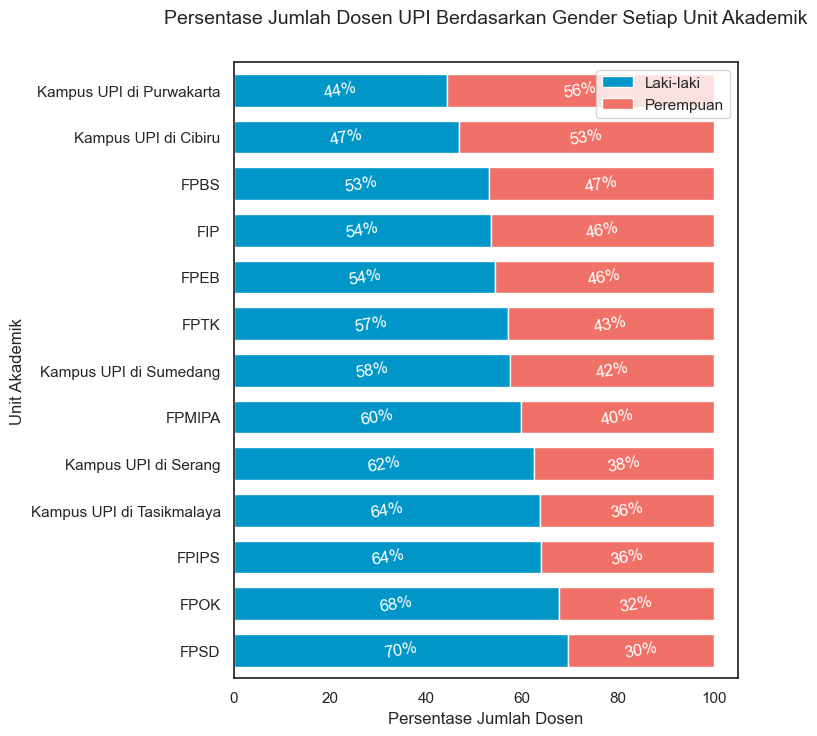

In [16]:
plt.rcParams["figure.figsize"] = (6.5, 8)

df_stack_gender.plot(
  x = 'fakultas', width=0.7,
  kind = 'barh', 
  stacked = True, cmap=custom_palette, 
  mark_right = True)

df_total = 100
df_rel = df_stack_gender[df_stack_gender.columns[1:]].div(df_total, 0) * 100

plt.title(f"{chart}", size=14, y=1.05)
plt.xlabel("Persentase Jumlah Dosen")
plt.ylabel("Unit Akademik")
    
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_stack_gender.iloc[:, 1:].cumsum(1)[n], 
                                         df_stack_gender[n], df_rel[n])):
        if pc != 0:
            plt.text(cs - ab / 2, i, str(np.round(pc, 0).astype(int)) + '%', 
                 va = 'center', ha = 'center', rotation = 10, fontsize = 12, color='white')

In [17]:
sns.set_theme(style="whitegrid")
custom_palette = sns.set_palette(sns.color_palette(colors))

chart = 'Jumlah Dosen UPI Berdasarkan Gender Setiap Unit Akademik'

Markdown("""
### {title}
""".format(title=chart))


### Jumlah Dosen UPI Berdasarkan Gender Setiap Unit Akademik


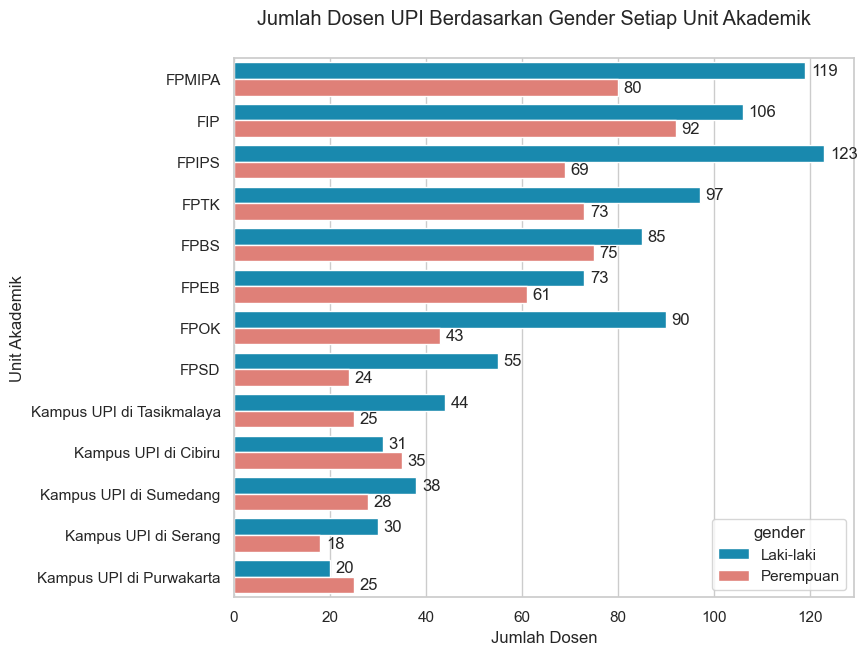

In [18]:
plt.figure(figsize=(8, 7))
plt.suptitle(f'{chart}', y=0.95)

g = sns.countplot(data=df, y='fakultas', hue='gender', order=df['fakultas'].value_counts().index, palette=custom_palette)
g.set(ylabel='Unit Akademik', xlabel='Jumlah Dosen')

for container in g.containers:
    g.bar_label(container, padding=4)

plt.show()

In [19]:
sns.set_style("white")

chart = 'Persentase Jumlah Dosen UPI Berdasarkan Pendidikan Terakhir Setiap Unit Akademik'

Markdown("""
### {title}
""".format(title=chart))


### Persentase Jumlah Dosen UPI Berdasarkan Pendidikan Terakhir Setiap Unit Akademik


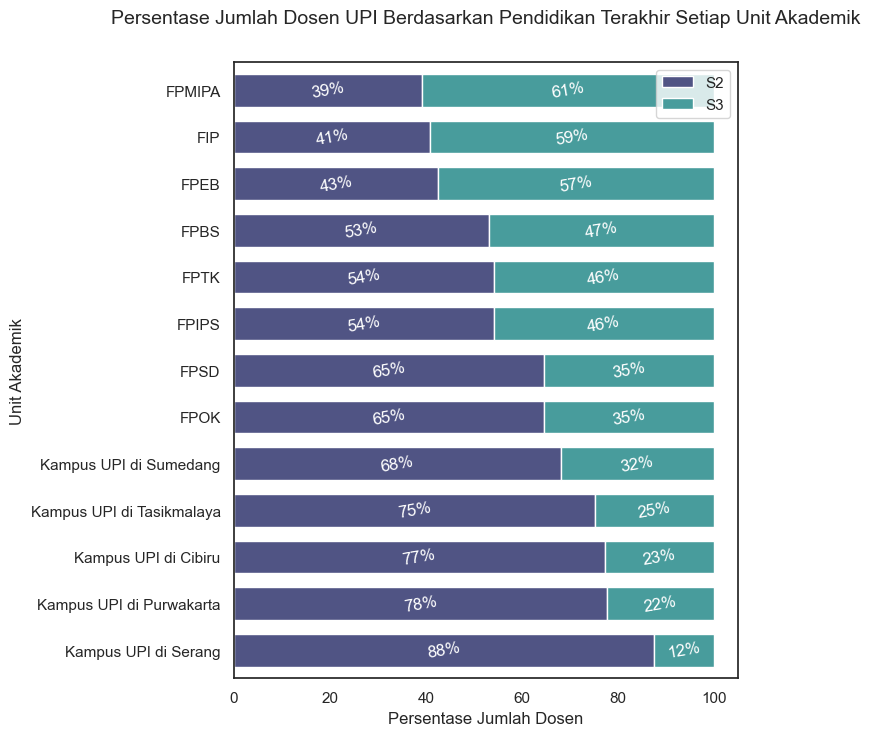

In [20]:
plt.rcParams["figure.figsize"] = (6.5, 8)

df_stack_pend.plot(
  x = 'fakultas', width=0.7,
  kind = 'barh', 
  stacked = True, cmap=mako, 
  mark_right = True)

df_total = 100
df_rel = df_stack_pend[df_stack_pend.columns[1:]].div(df_total, 0) * 100

plt.title(f"{chart}", size=14, y=1.05)
plt.xlabel("Persentase Jumlah Dosen")
plt.ylabel("Unit Akademik")
    
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_stack_pend.iloc[:, 1:].cumsum(1)[n], 
                                         df_stack_pend[n], df_rel[n])):
        if pc != 0:
            plt.text(cs - ab / 2, i, str(np.round(pc, 0).astype(int)) + '%', 
                 va = 'center', ha = 'center', rotation = 10, fontsize = 12, color='white')

In [21]:
sns.set_theme(style="whitegrid")

chart = 'Jumlah Dosen UPI Berdasarkan Pendidikan Terakhir Setiap Unit Akademik'

Markdown("""
### {title}
""".format(title=chart))


### Jumlah Dosen UPI Berdasarkan Pendidikan Terakhir Setiap Unit Akademik


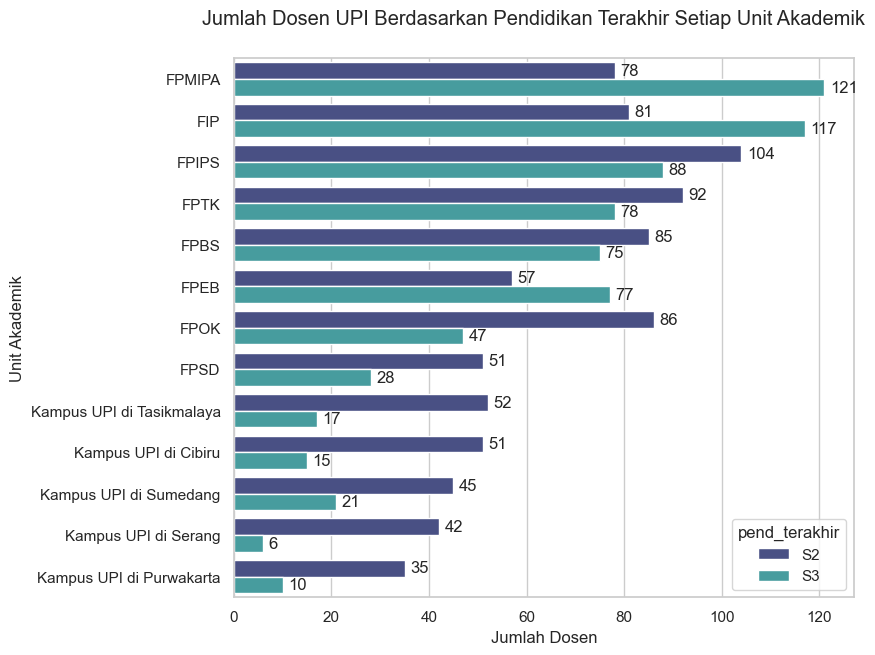

In [22]:
plt.figure(figsize=(8, 7))
plt.suptitle(f'{chart}', y=0.95)

df_sort_pend = df.sort_values(by='pend_terakhir', ascending=True)
g = sns.countplot(data=df_sort_pend, y='fakultas', hue='pend_terakhir', order=df['fakultas'].value_counts().index, palette='mako')
g.set(ylabel='Unit Akademik', xlabel='Jumlah Dosen')

for container in g.containers:
    g.bar_label(container, padding=4)

plt.show()

In [23]:
sns.set_style("white")

chart = 'Persentase Jumlah Dosen UPI Berdasarkan Jabatan Fungsional Setiap Unit Akademik'

Markdown("""
### {title}
""".format(title=chart))


### Persentase Jumlah Dosen UPI Berdasarkan Jabatan Fungsional Setiap Unit Akademik


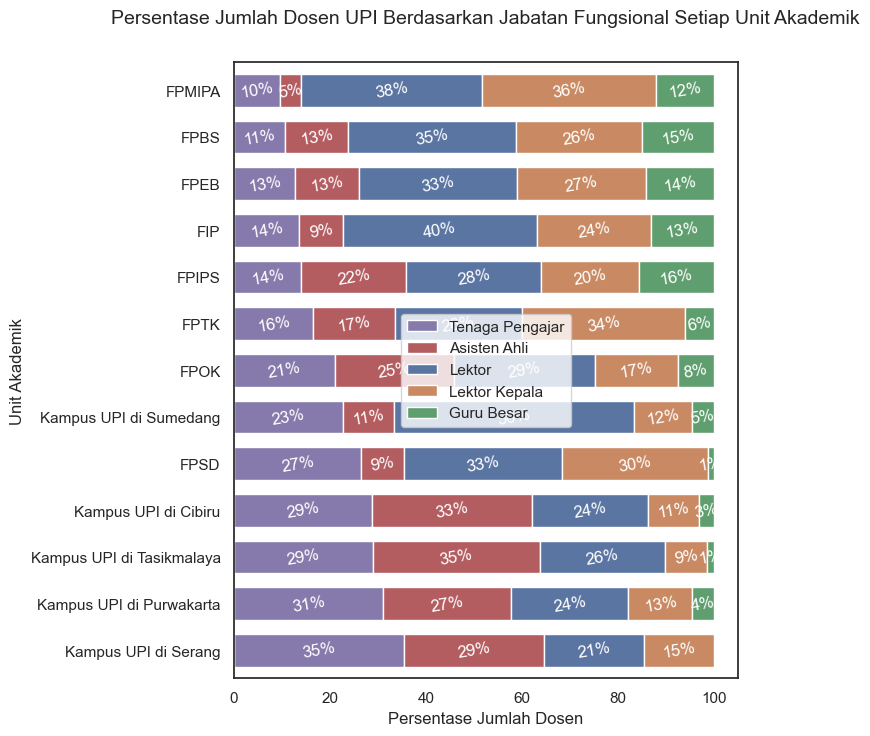

In [24]:
plt.rcParams["figure.figsize"] = (6.5, 8)

df_stack_jabfung.plot(
  x = 'fakultas', width=0.7,
  kind = 'barh', 
  stacked = True, cmap=cmap_jabfung, 
  mark_right = True)

df_total = 100
df_rel = df_stack_jabfung[df_stack_jabfung.columns[1:]].div(df_total, 0) * 100

plt.title(f"{chart}", size=14, y=1.05)
plt.xlabel("Persentase Jumlah Dosen")
plt.ylabel("Unit Akademik")
    
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_stack_jabfung.iloc[:, 1:].cumsum(1)[n], 
                                         df_stack_jabfung[n], df_rel[n])):
        if pc != 0:
            plt.text(cs - ab / 2, i, str(np.round(pc, 0).astype(int)) + '%', 
                 va = 'center', ha = 'center', rotation = 10, fontsize = 12, color='white')

In [25]:
chart = 'Persentase Jumlah Dosen UPI Berdasarkan Golongan Setiap Unit Akademik'

Markdown("""
### {title}
""".format(title=chart))


### Persentase Jumlah Dosen UPI Berdasarkan Golongan Setiap Unit Akademik


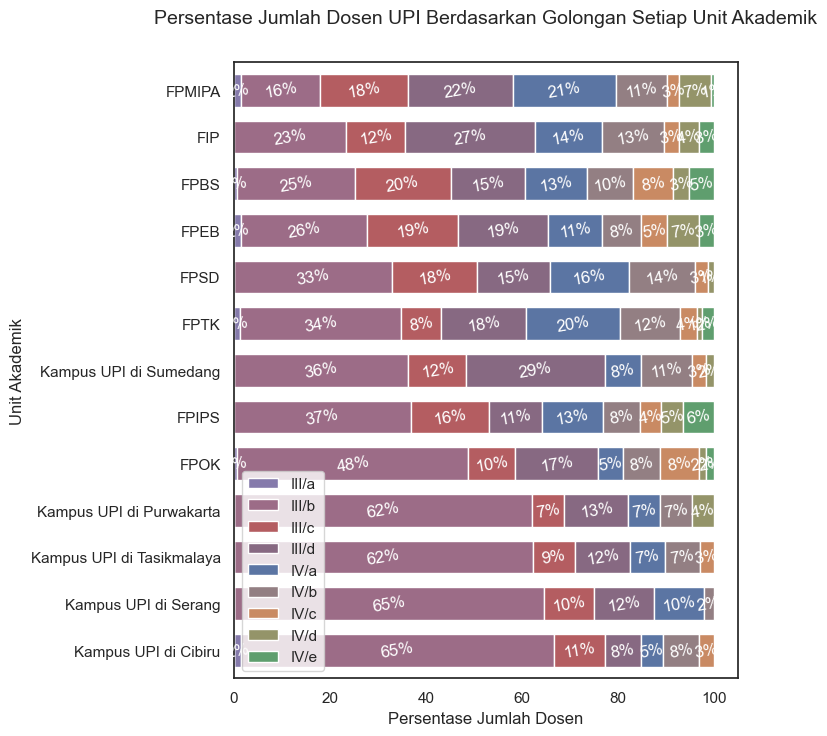

In [26]:
plt.rcParams["figure.figsize"] = (6.5, 8)

df_stack_gol.plot(
  x = 'fakultas', width=0.7,
  kind = 'barh', 
  stacked = True, cmap=cmap_jabfung, 
  mark_right = True)

df_total = 100
df_rel = df_stack_gol[df_stack_gol.columns[1:]].div(df_total, 0) * 100

plt.title(f"{chart}", size=14, y=1.05)
plt.xlabel("Persentase Jumlah Dosen")
plt.ylabel("Unit Akademik")
    
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_stack_gol.iloc[:, 1:].cumsum(1)[n], 
                                         df_stack_gol[n], df_rel[n])):
        if pc != 0:
            plt.text(cs - ab / 2, i, str(np.round(pc, 0).astype(int)) + '%', 
                 va = 'center', ha = 'center', rotation = 10, fontsize = 12, color='white')

In [27]:
sns.set_theme(style="whitegrid")

chart = '5 Unit Akademik Teratas Berdasarkan Median Scopus H-Index, Google Scholar H-Index, SINTA Score, dan SINTA 3yr Score'

Markdown("""
### {title}
""".format(title=chart))


### 5 Unit Akademik Teratas Berdasarkan Median Scopus H-Index, Google Scholar H-Index, SINTA Score, dan SINTA 3yr Score


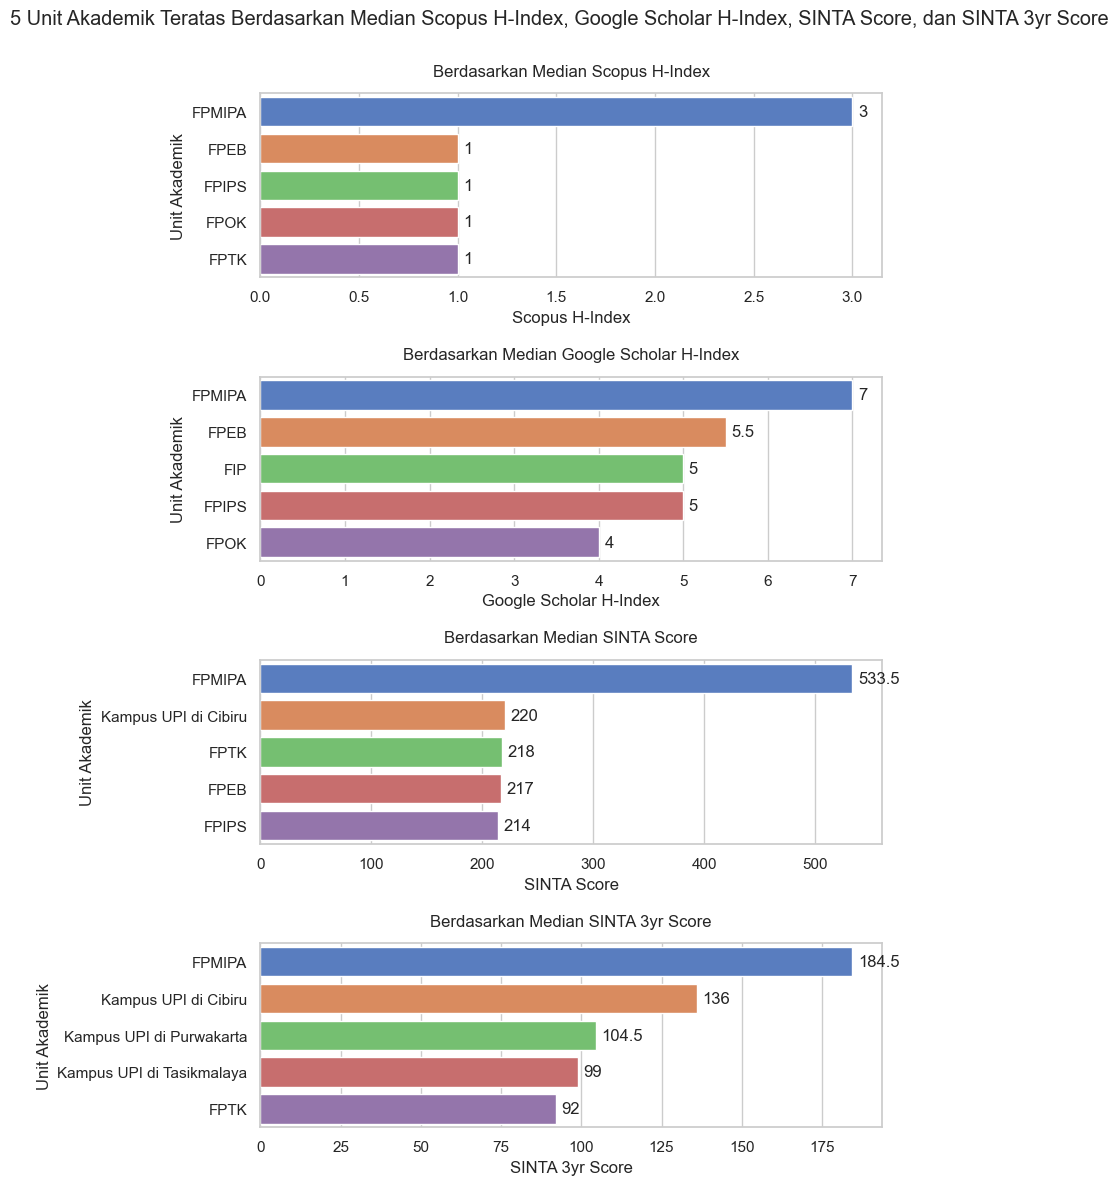

In [28]:
fig, axes = plt.subplots(4, 1, figsize=(8, 12))
fig.tight_layout(pad=4)

plt.suptitle(f'{chart}', y=1.01)

list_top_score = ['scopus_h_index', 'gs_h_index', 'sinta_score', 'sinta_3yr_score']
list_df_top = ['df_top_scopus', 'df_top_gs', 'df_top_sinta_score', 'df_top_sinta3yr']
list_label = ['Scopus H-Index', 'Google Scholar H-Index', 'SINTA Score', 'SINTA 3yr Score']

for x, y in zip(list_df_top, list_top_score):
    top_score = df.groupby('fakultas')[y].median().reset_index()
    globals()[x] = top_score.sort_values(by=y, ascending=False)

for x, y, z, ax in zip(list_top_score, list_df_top, list_label, axes.flatten()):
    g = sns.barplot(x=x, y='fakultas', data=globals()[y].head(5), palette='muted', ax=ax)
    g.set(ylabel='Unit Akademik', xlabel=z)
    g.set_title(f'Berdasarkan Median {z}',fontweight="normal", size=12, y=1.05)
    
    for container in g.containers:
        g.bar_label(container, padding=4)

plt.show()

### Outlier Handling: IQR

In [29]:
import warnings
warnings.filterwarnings('ignore')

def iqr(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    new_df_cap = df.copy()
    new_df_cap[col] = np.where(
        new_df_cap[col] > upper_limit,
        upper_limit,
        np.where(
            new_df_cap[col] < lower_limit,
            lower_limit,
            new_df_cap[col]
        )
    )
    return new_df_cap

In [30]:
chart = 'Distribusi Scopus H-Index, Google Scholar H-Index, SINTA Score, dan SINTA 3yr Score'

Markdown("""
### {title}
""".format(title=chart))


### Distribusi Scopus H-Index, Google Scholar H-Index, SINTA Score, dan SINTA 3yr Score


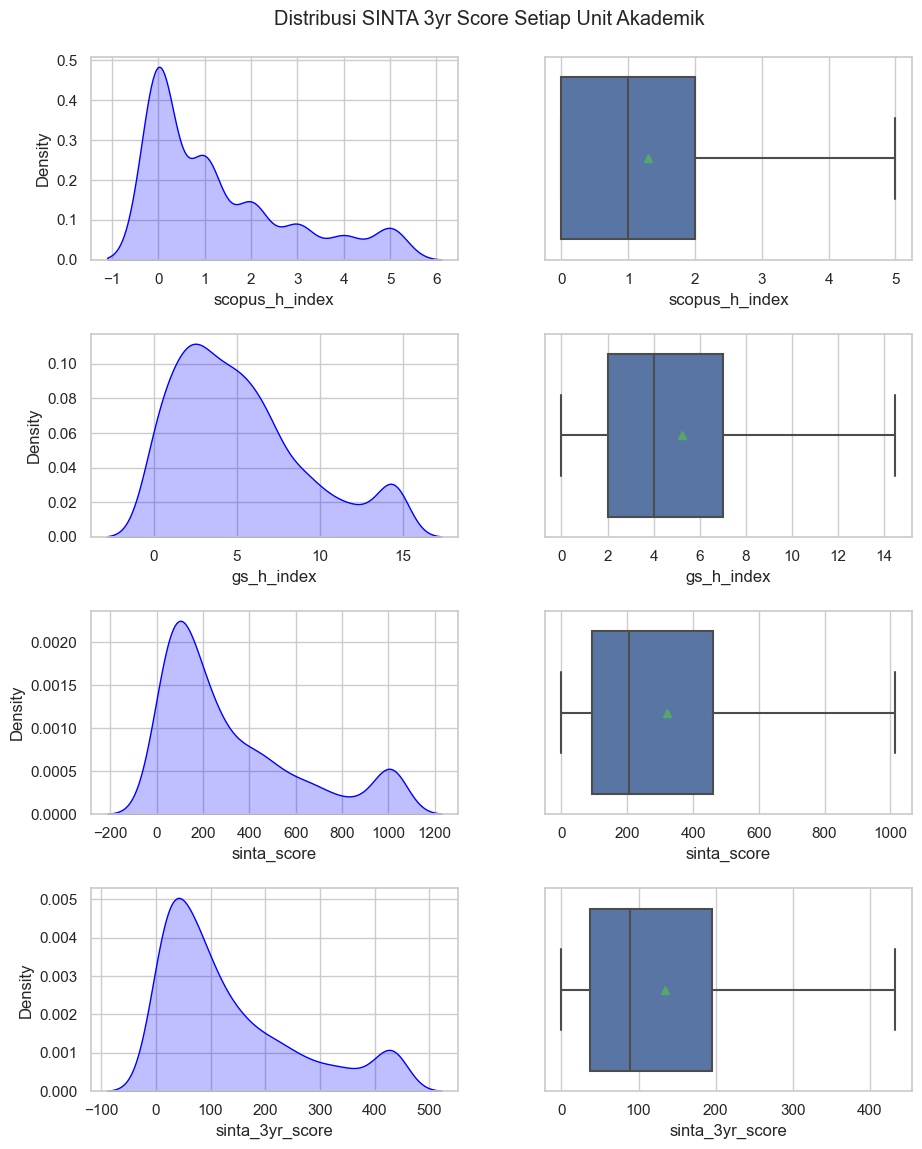

In [42]:
df_not_null = df.dropna(subset=['sinta_score'])
list_df_iqr = ['iqr_scopus', 'iqr_gs', 'iqr_sinta', 'iqr_sinta3yr']
list_var = ['scopus_h_index', 'gs_h_index', 'sinta_score', 'sinta_3yr_score']

for x, y in zip(list_df_iqr, list_var):
    globals()[x] = iqr(df_not_null, y)


fig, axs = plt.subplots(4, 2, figsize=(9.5, 11.5))
fig.tight_layout(pad=2.5)

fig.suptitle(f"{chart}", y=1)

sns.kdeplot(iqr_scopus.scopus_h_index, color="Blue", shade=True, ax=axs[0, 0])
sns.boxplot(iqr_scopus['scopus_h_index'], showmeans=True, ax=axs[0, 1])

sns.kdeplot(iqr_gs.gs_h_index, color="Blue", shade=True, ax=axs[1, 0])
sns.boxplot(iqr_gs['gs_h_index'], showmeans=True, ax=axs[1, 1])

sns.kdeplot(iqr_sinta.sinta_score, color="Blue", shade=True, ax=axs[2, 0])
sns.boxplot(iqr_sinta['sinta_score'], showmeans=True, ax=axs[2, 1])

sns.kdeplot(iqr_sinta3yr.sinta_3yr_score, color="Blue", shade=True, ax=axs[3, 0])
sns.boxplot(iqr_sinta3yr['sinta_3yr_score'], showmeans=True, ax=axs[3, 1])

plt.show()


In [32]:
chart = 'Distribusi Scopus H-Index Setiap Unit Akademik'

Markdown("""
### {title}
""".format(title=chart))


### Distribusi Scopus H-Index Setiap Unit Akademik


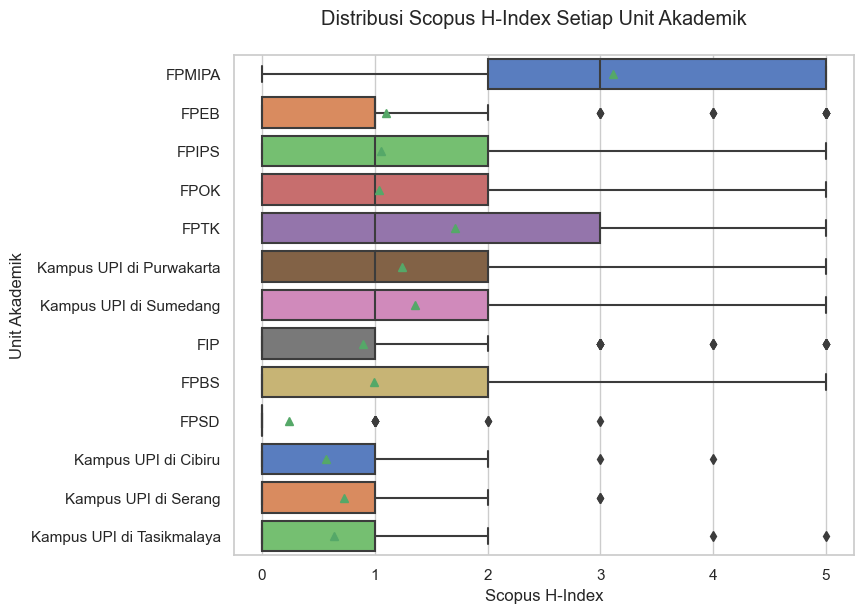

In [33]:
plt.figure(figsize=(8, 6.5))
plt.suptitle(f'{chart}', y=0.95)

g = sns.boxplot(x='scopus_h_index', y='fakultas', data=iqr_scopus, order=df_top_scopus['fakultas'], palette='muted', showmeans=True)
g.set(ylabel='Unit Akademik', xlabel='Scopus H-Index')

plt.show()

In [34]:
chart = 'Distribusi Google Scholar H-Index Setiap Unit Akademik'

Markdown("""
### {title}
""".format(title=chart))


### Distribusi Google Scholar H-Index Setiap Unit Akademik


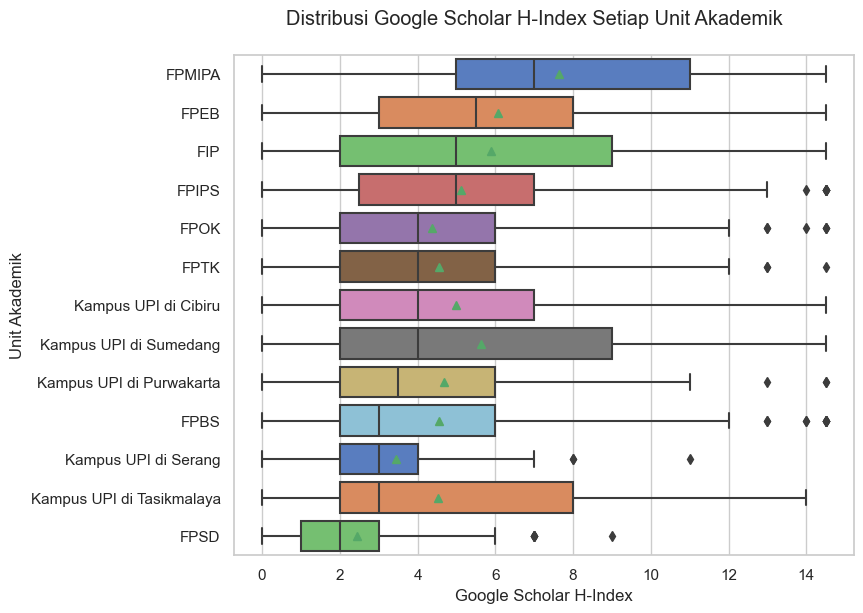

In [35]:
plt.figure(figsize=(8, 6.5))
plt.suptitle(f'{chart}', y=0.95)

g = sns.boxplot(x='gs_h_index', y='fakultas', data=iqr_gs, order=df_top_gs['fakultas'], palette='muted', showmeans=True)
g.set(ylabel='Unit Akademik', xlabel='Google Scholar H-Index')

plt.show()

In [36]:
chart = 'Distribusi SINTA Score Setiap Unit Akademik'

Markdown("""
### {title}
""".format(title=chart))


### Distribusi SINTA Score Setiap Unit Akademik


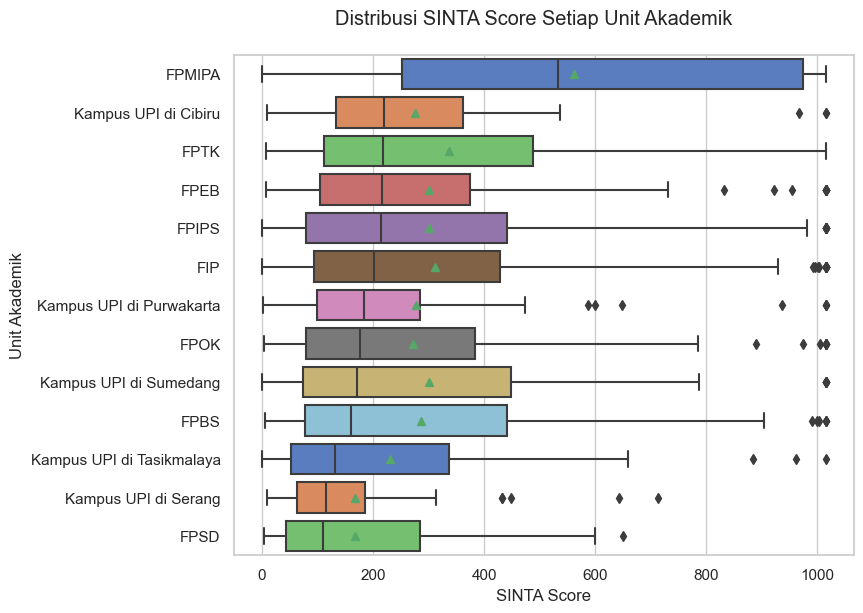

In [37]:
plt.figure(figsize=(8, 6.5))
plt.suptitle(f'{chart}', y=0.95)

g = sns.boxplot(x='sinta_score', y='fakultas', data=iqr_sinta, order=df_top_sinta_score['fakultas'], palette='muted', showmeans=True)
g.set(ylabel='Unit Akademik', xlabel='SINTA Score')

plt.show()

In [38]:
chart = 'Distribusi SINTA 3yr Score Setiap Unit Akademik'

Markdown("""
### {title}
""".format(title=chart))


### Distribusi SINTA 3yr Score Setiap Unit Akademik


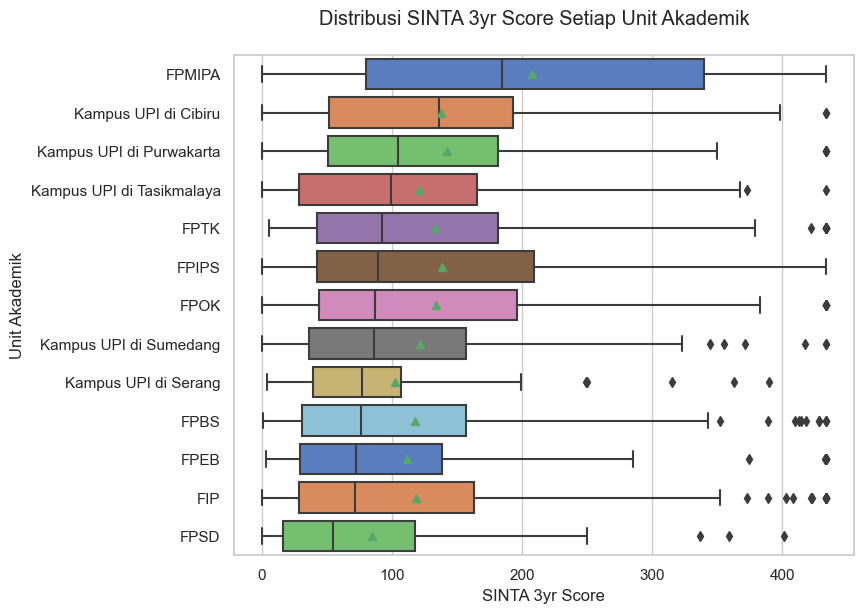

In [39]:
plt.figure(figsize=(8, 6.5))
plt.suptitle(f'{chart}', y=0.95)

g = sns.boxplot(x='sinta_3yr_score', y='fakultas', data=iqr_sinta3yr, order=df_top_sinta3yr['fakultas'], palette='muted', showmeans=True)
g.set(ylabel='Unit Akademik', xlabel='SINTA 3yr Score')

plt.show()